# Assignment 4 (Forest Cover)

- Name: **Arnab Sen**
- Roll: **510519006**
- Date: **Sept 5, 2022**

In [1]:
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import numpy as np

In [2]:
drive.mount('/content/drive')
BASE_PATH = '/content/drive/MyDrive/Colab_Notebooks/ML_DRIVE/Assign_4/dataset'

Mounted at /content/drive


In [3]:
dataset = pd.read_csv(f"{BASE_PATH}/train_and_test2.csv")
print("Dataset shape:", dataset.shape)
print("Dataset columns:", dataset.columns)

Dataset shape: (1309, 28)
Dataset columns: Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')


In [4]:
# Let's check for missing values once
dataset.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64

In [5]:
columns_to_drop = ['Passengerid', 'zero', 'zero.1', 'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'zero.7', 'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13', 'zero.14', 'zero.15', 'zero.16', 'zero.17', 'zero.18']
dataset = dataset.drop(columns_to_drop, axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1309 non-null   float64
 1   Fare      1309 non-null   float64
 2   Sex       1309 non-null   int64  
 3   sibsp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Pclass    1309 non-null   int64  
 6   Embarked  1307 non-null   float64
 7   2urvived  1309 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 81.9 KB


In [6]:
encoded_cols = ["Pclass", "Embarked"]
dataset = pd.get_dummies(dataset, columns=encoded_cols)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           1309 non-null   float64
 1   Fare          1309 non-null   float64
 2   Sex           1309 non-null   int64  
 3   sibsp         1309 non-null   int64  
 4   Parch         1309 non-null   int64  
 5   2urvived      1309 non-null   int64  
 6   Pclass_1      1309 non-null   uint8  
 7   Pclass_2      1309 non-null   uint8  
 8   Pclass_3      1309 non-null   uint8  
 9   Embarked_0.0  1309 non-null   uint8  
 10  Embarked_1.0  1309 non-null   uint8  
 11  Embarked_2.0  1309 non-null   uint8  
dtypes: float64(2), int64(4), uint8(6)
memory usage: 69.2 KB


In [7]:
scaled_cols = ['Age','Fare']

for col in scaled_cols:
    scaler = StandardScaler()
    dataset[[col]] = pd.DataFrame(
        data=scaler.fit_transform(dataset[[col]]),
        index=dataset.index,
        columns=[col]
    )

dataset.head()

,Age,Fare,Sex,sibsp,Parch,2urvived,Pclass_1,Pclass_2,Pclass_3,Embarked_0.0,Embarked_1.0,Embarked_2.0
0,-0.581628,-0.503291,0,1,0,0,0,0,1,0,0,1
1,0.658652,0.734744,1,1,0,1,1,0,0,1,0,0
2,-0.271558,-0.490240,1,0,0,1,0,0,1,0,0,1
3,0.426099,0.383183,1,1,0,1,1,0,0,0,0,1
4,0.426099,-0.487824,0,0,0,0,0,0,1,0,0,1


In [8]:
X = dataset.drop('2urvived', axis=1)
y = dataset['2urvived']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

print(X_train.shape, y_train.shape)

(1047, 11) (1047,)


In [10]:
def svm_model_helper(X_train, y_train, X_test, y_test, kernel, degree): 
  model = SVC(kernel=kernel, degree=degree)
  model.fit(X_train, y_train)
  svm_predictions = model.predict(X_test)

  accuracy = model.score(X_test, y_test)
  f1 = f1_score(y_test, svm_predictions, average='macro')

  return [kernel, degree, accuracy, f1]

In [11]:
linear = svm_model_helper(X_train, y_train, X_test, y_test, 'linear', 1)
poly2 = svm_model_helper(X_train, y_train, X_test, y_test, 'poly', 2)
poly3 = svm_model_helper(X_train, y_train, X_test, y_test, 'poly', 3)
poly5 = svm_model_helper(X_train, y_train, X_test, y_test, 'poly', 5)
rbf = svm_model_helper(X_train, y_train, X_test, y_test, 'rbf', 1)
sigmoid = svm_model_helper(X_train, y_train, X_test, y_test, 'sigmoid', 1)

pd.DataFrame(
    columns=['kernel', 'degree', 'accuracy', 'f1_score'],
    data=[linear, poly2, poly3, poly5, rbf, sigmoid]
)

,kernel,degree,accuracy,f1_score
0,linear,1,0.767176,0.692672
1,poly,2,0.767176,0.692672
2,poly,3,0.770992,0.696197
3,poly,5,0.744275,0.662443
4,rbf,1,0.770992,0.699196
5,sigmoid,1,0.664122,0.545139


In [12]:
X_train_new = X_train[['Age', 'Fare']]
X_test_new = X_test[['Age', 'Fare']]

In [28]:
xr, yr = X_train_new.values, y_train.values
x_min, x_max = xr[:, 0].min() - 0.1, xr[:, 0].max() + 0.1
y_min, y_max = xr[:, 1].min() - 0.1, xr[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
def plotter(kernel, degree = 0):
  poly3 = SVC(kernel=kernel, degree=degree)
  poly3.fit(X_train_new, y_train)
  poly3.fit(xr, yr)
  Z = poly3.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
  plt.scatter(xr[:, 0], xr[:, 1], c=yr, cmap=plt.cm.coolwarm)
  plt.xlabel('Age')
  plt.ylabel('Fare')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

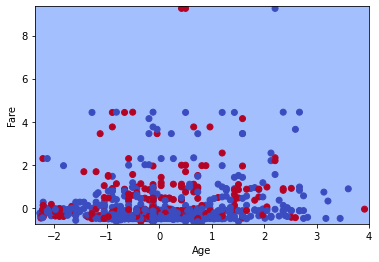

In [29]:
# linear = SVC(kernel='linear')
# linear.fit(X_train_new, y_train)

# plt.scatter(
#     X_train_new['Age'], 
#     X_train_new['Fare'], 
#     c=y_train,
#     s=6
# )

plotter('linear')

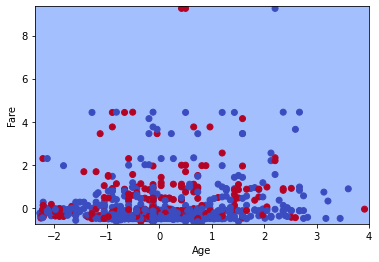

In [32]:
plotter('poly', 2)

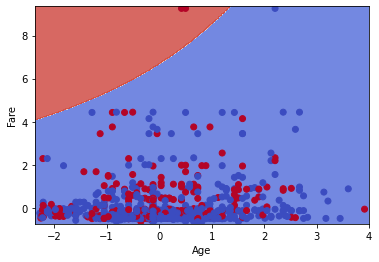

In [33]:
plotter('poly', 3)

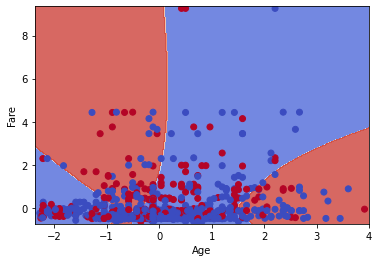

In [35]:
plotter('sigmoid')

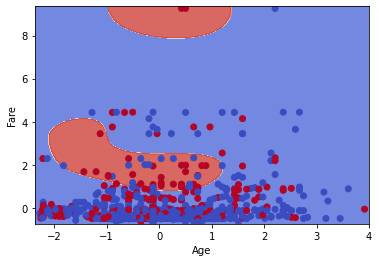

In [36]:
plotter('rbf')

In [37]:
def findOptimalC(X_train, y_train, X_test, y_test, start, end, step):
    c = start
    accuracies = []
    C_values = []
    while(c<=end):
        
        model = SVC(kernel='rbf', C=c, gamma=0.5)
        model.fit(X_train, y_train)
        acc = model.score(X_test, y_test)
        
        C_values.append(c)
        accuracies.append(acc)
        c+=step
    
    return [accuracies, C_values]

In [41]:
result = findOptimalC(X_train, y_train, X_test, y_test, 0.001, 100, 0.5)
print(result)

[[0.7137404580152672, 0.7519083969465649, 0.767175572519084, 0.7633587786259542, 0.7709923664122137, 0.7519083969465649, 0.7442748091603053, 0.7404580152671756, 0.7404580152671756, 0.7404580152671756, 0.7290076335877863, 0.7290076335877863, 0.7251908396946565, 0.7251908396946565, 0.7251908396946565, 0.7251908396946565, 0.7251908396946565, 0.7251908396946565, 0.7290076335877863, 0.732824427480916, 0.732824427480916, 0.7442748091603053, 0.7442748091603053, 0.7442748091603053, 0.7442748091603053, 0.7442748091603053, 0.7442748091603053, 0.7442748091603053, 0.7442748091603053, 0.7442748091603053, 0.7480916030534351, 0.7480916030534351, 0.7480916030534351, 0.7519083969465649, 0.7519083969465649, 0.7519083969465649, 0.7519083969465649, 0.7519083969465649, 0.7519083969465649, 0.7519083969465649, 0.7519083969465649, 0.7519083969465649, 0.7519083969465649, 0.7519083969465649, 0.7519083969465649, 0.7519083969465649, 0.7519083969465649, 0.7519083969465649, 0.7519083969465649, 0.7480916030534351, 0

In [42]:
result = findOptimalC(X_train, y_train, X_test, y_test, 0.001, 10, 0.1)
print(result)

[[0.7137404580152672, 0.7137404580152672, 0.7175572519083969, 0.7404580152671756, 0.7519083969465649, 0.7519083969465649, 0.7595419847328244, 0.7557251908396947, 0.767175572519084, 0.767175572519084, 0.767175572519084, 0.767175572519084, 0.767175572519084, 0.7633587786259542, 0.7633587786259542, 0.7633587786259542, 0.7633587786259542, 0.7633587786259542, 0.7633587786259542, 0.767175572519084, 0.7709923664122137, 0.767175572519084, 0.7633587786259542, 0.7595419847328244, 0.7557251908396947, 0.7519083969465649, 0.7442748091603053, 0.7442748091603053, 0.7442748091603053, 0.7442748091603053, 0.7442748091603053, 0.7442748091603053, 0.7404580152671756, 0.7404580152671756, 0.7404580152671756, 0.7404580152671756, 0.7404580152671756, 0.7404580152671756, 0.7404580152671756, 0.7404580152671756, 0.7404580152671756, 0.7404580152671756, 0.7404580152671756, 0.7404580152671756, 0.7404580152671756, 0.7404580152671756, 0.7404580152671756, 0.7404580152671756, 0.7366412213740458, 0.732824427480916, 0.7290

In [43]:
result = findOptimalC(X_train, y_train, X_test, y_test, 0.001, 1, 0.005)
print(result)

[[0.7137404580152672, 0.7137404580152672, 0.7137404580152672, 0.7137404580152672, 0.7137404580152672, 0.7137404580152672, 0.7137404580152672, 0.7137404580152672, 0.7137404580152672, 0.7137404580152672, 0.7137404580152672, 0.7137404580152672, 0.7137404580152672, 0.7137404580152672, 0.7137404580152672, 0.7137404580152672, 0.7137404580152672, 0.7137404580152672, 0.7137404580152672, 0.7137404580152672, 0.7137404580152672, 0.7175572519083969, 0.7175572519083969, 0.7175572519083969, 0.7251908396946565, 0.7251908396946565, 0.7251908396946565, 0.732824427480916, 0.732824427480916, 0.7366412213740458, 0.7366412213740458, 0.732824427480916, 0.732824427480916, 0.7290076335877863, 0.7213740458015268, 0.7137404580152672, 0.7137404580152672, 0.7175572519083969, 0.7175572519083969, 0.7175572519083969, 0.7175572519083969, 0.7175572519083969, 0.7175572519083969, 0.7213740458015268, 0.7213740458015268, 0.7251908396946565, 0.7290076335877863, 0.7366412213740458, 0.7366412213740458, 0.7404580152671756, 0.

In [44]:
ind = np.argmax(result[0], axis=0)
optimal_c = result[1][ind]
print("Optimal C:",optimal_c)
print("Accuracy:", result[0][ind])

Optimal C: 0.7960000000000006
Accuracy: 0.767175572519084


In [45]:
def findOptimalG(X_train, y_train, X_test, y_test, C, start, end, step):
    g = start
    accuracies = []
    G_values = []
    while(g<=end):
        
        model = SVC(kernel='rbf', C=C, gamma=g)
        model.fit(X_train, y_train)
        acc = model.score(X_test, y_test)
        
        G_values.append(g)
        accuracies.append(acc)
        g+=step
    
    return [accuracies, G_values]

In [46]:
result = findOptimalG(X_train, y_train, X_test, y_test, optimal_c, 0.01, 10, 0.05)
print(result)

[[0.7137404580152672, 0.7633587786259542, 0.7709923664122137, 0.7748091603053435, 0.7748091603053435, 0.7709923664122137, 0.767175572519084, 0.7633587786259542, 0.7633587786259542, 0.7595419847328244, 0.7633587786259542, 0.7595419847328244, 0.7595419847328244, 0.7519083969465649, 0.7442748091603053, 0.7404580152671756, 0.732824427480916, 0.7290076335877863, 0.7251908396946565, 0.7251908396946565, 0.7290076335877863, 0.7251908396946565, 0.7251908396946565, 0.7251908396946565, 0.7251908396946565, 0.7213740458015268, 0.7213740458015268, 0.7290076335877863, 0.732824427480916, 0.732824427480916, 0.7290076335877863, 0.7290076335877863, 0.7290076335877863, 0.7290076335877863, 0.7290076335877863, 0.7213740458015268, 0.7213740458015268, 0.7213740458015268, 0.7213740458015268, 0.7175572519083969, 0.7175572519083969, 0.7175572519083969, 0.7175572519083969, 0.7175572519083969, 0.7175572519083969, 0.7175572519083969, 0.7175572519083969, 0.7175572519083969, 0.7175572519083969, 0.7175572519083969, 0.

In [47]:
result = findOptimalG(X_train, y_train, X_test, y_test, optimal_c, 0.01, 1, 0.005)
print(result)

[[0.7137404580152672, 0.7137404580152672, 0.7137404580152672, 0.7137404580152672, 0.7099236641221374, 0.7404580152671756, 0.732824427480916, 0.7404580152671756, 0.7519083969465649, 0.7633587786259542, 0.7633587786259542, 0.767175572519084, 0.7709923664122137, 0.7709923664122137, 0.7709923664122137, 0.7709923664122137, 0.7748091603053435, 0.7748091603053435, 0.7748091603053435, 0.7709923664122137, 0.7709923664122137, 0.7709923664122137, 0.7709923664122137, 0.7748091603053435, 0.7748091603053435, 0.7786259541984732, 0.7748091603053435, 0.7748091603053435, 0.7748091603053435, 0.7748091603053435, 0.7748091603053435, 0.7709923664122137, 0.7709923664122137, 0.767175572519084, 0.767175572519084, 0.7709923664122137, 0.7709923664122137, 0.7709923664122137, 0.7709923664122137, 0.7709923664122137, 0.7748091603053435, 0.7748091603053435, 0.7748091603053435, 0.7748091603053435, 0.7748091603053435, 0.7748091603053435, 0.7748091603053435, 0.7748091603053435, 0.7748091603053435, 0.7709923664122137, 0.

In [48]:
ind = np.argmax(result[0], axis=0)
optimal_g = result[1][ind]
print("Optimal G:",optimal_g)
print("Accuracy:", result[0][ind])

Optimal G: 0.13500000000000004
Accuracy: 0.7786259541984732


In [49]:
C_values = np.arange(0.01, 1, 0.05)
G_values = np.arange(0.01, 1, 0.05)

In [51]:
param_grid = {'C': C_values, 'gamma': G_values,'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46, 0.51,
       0.56, 0.61, 0.66, 0.71, 0.76, 0.81, 0.86, 0.91, 0.96]),
                         'gamma': array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46, 0.51,
       0.56, 0.61, 0.66, 0.71, 0.76, 0.81, 0.86, 0.91, 0.96]),
                         'kernel': ['rbf']})

In [52]:
print(grid.best_estimator_)

SVC(C=0.7100000000000001, gamma=0.21000000000000002)


In [53]:
acc = grid.score(X_test, y_test)
print("Accuracy:", acc)

Accuracy: 0.7748091603053435
